In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

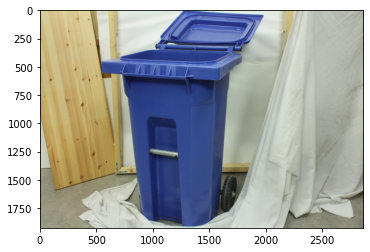

In [2]:
image = plt.imread('Data\Recycle-perfect\im0.png')
plt.imshow(image)
plt.show()

In [3]:
def dof_blur(color_image, disparity_map, disp_in_focus, levels=10, blurriness=1.5):
    # Simulate depth of field effect
    # 
    # Inputs:
    # color_image - the rgb image to apply dof effect on
    # disparity_map - the disparity map of the rgb image, 
    #                 should be aligned with the rgb image
    # disp_in_focus - the disparity of the plane in focus
    # levels - the number of disparity ranges to consider
    # blurrness - how strong the blurrness is if not in focus
    # 
    # Output:
    # Blurred image simulating depth of field effect

    h, w = color_image.shape[:2]
    disp_to_focus_map = np.abs(disparity_map - disp_in_focus)
    disp_min = np.min(disp_to_focus_map)
    disp_max = np.max(disp_to_focus_map)
    disp_strips = np.arange(disp_min, disp_max, (disp_max - disp_min) // levels)
    disp_strips = np.append(disp_strips, [disp_max])

    # blur color image according to different disparity
    result = color_image.copy()
    level_segmentation = np.zeros_like(disparity_map)
    for i in range(1, disp_strips.shape[0]):
        disp_low = disp_strips[i-1]
        disp_high = disp_strips[i]
        
        k_size = 2 * i + 1
                                                                  # make the 2nd strip also in focus
        blurred = cv2.GaussianBlur(color_image, (k_size, k_size), (i / 1.5) ** blurriness - (1 / 1.5) ** 1.2)
        loc = np.where(np.logical_and(disp_to_focus_map >= disp_low, disp_to_focus_map <= disp_high))
        level_segmentation[loc] = i
        result[loc] = blurred[loc]
    return result, level_segmentation

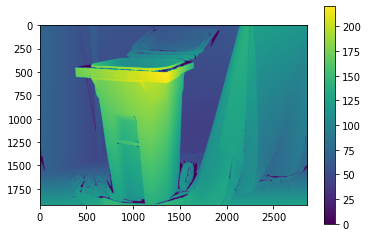

In [4]:
d = cv2.imread('Data\Recycle-perfect\disp1.pfm', cv2.IMREAD_UNCHANGED)
d[d==np.inf] = 0
d = 0.003922 * d
plt.imshow(d)
plt.colorbar()
plt.show()

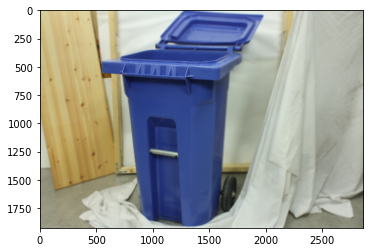

In [5]:
blur_image, level_seg = dof_blur(image, d, 220, 10, blurriness=10)
plt.imshow(blur_image)
plt.show()

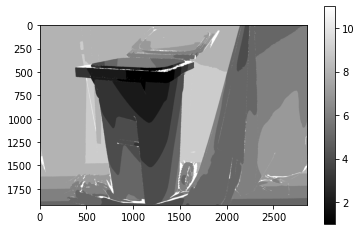

In [6]:
plt.imshow(level_seg, cmap='gray')
plt.colorbar()